In [ ]:
from keras.datasets               import cifar100
from keras.utils                  import np_utils
from keras.models                 import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout, LSTM
from tensorflow.keras.optimizers  import RMSprop
from keras.layers                 import Conv2D
from keras.layers                 import MaxPooling2D
from keras.layers                 import Flatten
from keras.callbacks              import EarlyStopping 

import matplotlib.pyplot as plt
import numpy as np

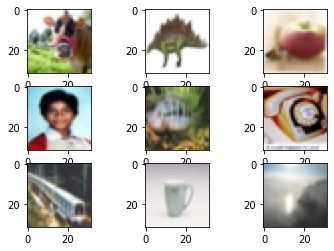

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()


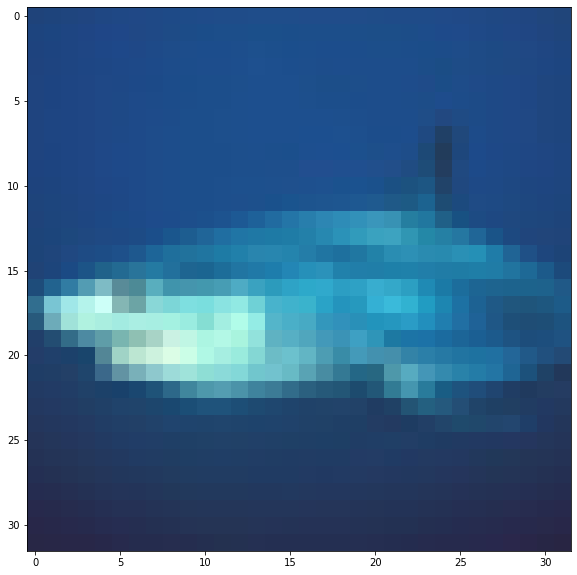

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[49999])

In [ ]:
x_train = x_train.reshape(50000,32,32,3)
x_test = x_test.reshape(10000,32,32,3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255

y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32,32,3)))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 16)        4624      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 32)        9248      
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=64,epochs=15,verbose=1,
                  validation_data=(x_test,y_test), 
                  callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
model.save('cifar100_model.h5')

Epoch 1/15
782/782 [==============================] - 159s 200ms/step - loss: 3.8655 - accuracy: 0.1184 - val_loss: 3.4595 - val_accuracy: 0.1939
Epoch 2/15
782/782 [==============================] - 154s 198ms/step - loss: 3.2232 - accuracy: 0.2306 - val_loss: 3.4009 - val_accuracy: 0.2143
Epoch 3/15
782/782 [==============================] - 154s 196ms/step - loss: 2.9233 - accuracy: 0.2901 - val_loss: 3.0829 - val_accuracy: 0.2585
Epoch 4/15
782/782 [==============================] - 153s 195ms/step - loss: 2.7173 - accuracy: 0.3330 - val_loss: 2.9062 - val_accuracy: 0.2995
Epoch 5/15
782/782 [==============================] - 153s 195ms/step - loss: 2.5537 - accuracy: 0.3677 - val_loss: 2.8174 - val_accuracy: 0.3108
Epoch 6/15
782/782 [==============================] - 151s 193ms/step - loss: 2.4273 - accuracy: 0.3939 - val_loss: 2.8697 - val_accuracy: 0.3190
Epoch 7/15
782/782 [==============================] - 151s 193ms/step - loss: 2.3179 - accuracy: 0.4164 - val_loss: 2.7837 -

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Test loss: 2.773732900619507
Test accuracy 0.3619000017642975


In [ ]:
y_pred = model.predict(x_test)
print(y_test)
print(y_pred)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[7.2954208e-07 2.0395523e-06 1.0316351e-02 ... 3.8018643e-05
  1.3472978e-03 1.9924819e-05]
 [4.6624213e-05 2.5913000e-04 5.6873010e-03 ... 3.1740341e-02
  7.1276218e-04 2.8814239e-04]
 [1.0599968e-05 1.2881566e-05 3.0165344e-02 ... 5.9325912e-04
  4.1881208e-03 3.0306359e-05]
 ...
 [9.8457467e-03 6.2594563e-04 4.6767201e-04 ... 5.7806019e-03
  2.3881611e-04 8.9188786e-03]
 [6.4232133e-08 2.5139190e-07 1.9615390e-03 ... 3.8888958e-01
  2.6955132e-04 6.0500781e-05]
 [6.1837852e-04 1.9432329e-04 1.4574970e-05 ... 2.5542679e-08
  6.9541479e-06 2.0962661e-06]]


<function matplotlib.pyplot.show>

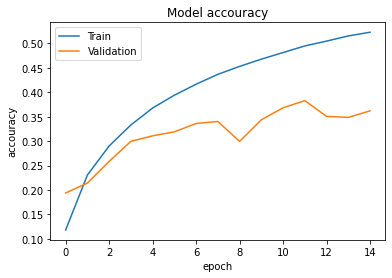

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accouracy')
plt.ylabel('accouracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show

Giá trị dự đoán:  15


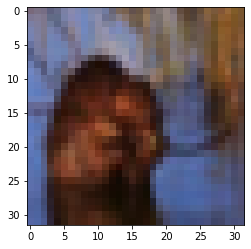

Giá trị dự đoán:  6


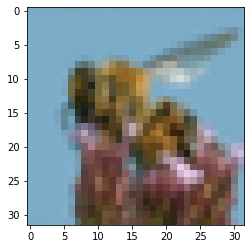

In [ ]:
for i in range(50,52):
  plt.imshow(x_test[i].reshape(32,32,3), cmap='gray')
  y_predict = model.predict(x_test[i].reshape(1,32,32,3))
  print('Giá trị dự đoán: ', np.argmax(y_predict))
  plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving horse.png to horse.png


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

img = load_img('horse.png', target_size=(32, 32))
img = img_to_array(img)
img = img.reshape(1, 32, 32, 3)
img = img.astype('float32')
img = img / 255.0

# load model
model_final = load_model('cifar100_model.h5')
# predict the class
result = model.predict(img)
print('Giá trị dự đoán:', np.argmax(result))
plt.show()


Giá trị dự đoán: 24
